<h1><center>DATA VISUALISATION WITH ROOT</center></h1>
<h3><center>Your Guide on How to Get a Decent Plot</center></h3>
<img src="./images/aplot.png">
As most particle physicists learnt the hard way, the most boring, cumbersome, annoying and time-consuming part of experimental particle physics is.... plotting. Besides the math and the programming, data visualisation is a commonly overlooked skill for data scientists. So, to save you from the burden and agony of going through ROOT forums one by one and reading the ROOT documentations blindly just to plot a decent mass distribution, we will teach it here.

Fair warning, this tutorial is not exhaustive nor was it meant to cover everything there is with plotting. It's just your starting wheels before you can cycle on your own. 

Alright, first off, every artist needs a canvas.

# TCanvas: Where Physicists Become (Bad) Artists

TCanvas is the place where ROOT objects that can be drawn are placed before being presented to the user. Thus, it serves as a basis for any plot. On top of the canvas is TPad, an object that acts as a graphical area. Every canvas has a default pad that carries the name of the canvas.

```
canv = ROOT.TCanvas(name, title, size on x axis, size on y axis)
```


In [1]:
import ROOT

canv = ROOT.TCanvas("canv", "A canvas", 600, 600)

Welcome to JupyROOT 6.22/00


As you have seen in the previous tutorial, we can plot a lot of stuff on the canvas, like TH1, TGraph, TF1 objects & etc. It is also possible to have multiple plots on an object using the ```Divide()``` method. It splits the TPad into parts that can be accessed using the  ```cd()``` method.

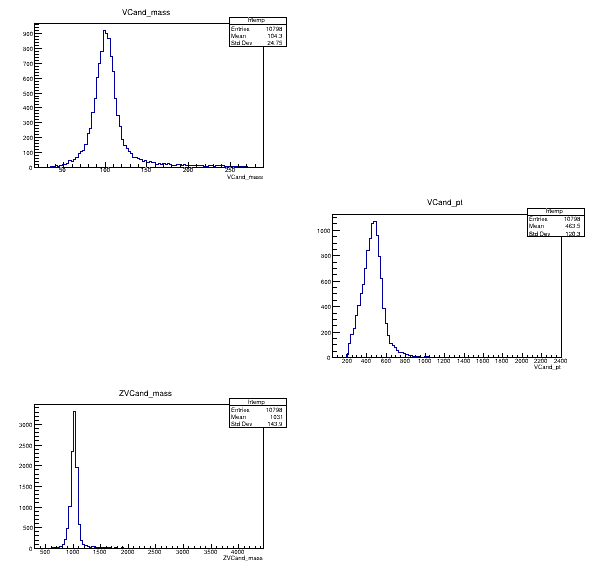

In [2]:
f    = ROOT.TFile("./rootfiles/signal.root", "OPEN")
tree = f.Get("mumu")

canv.Divide(2,3)
canv.cd(1)
tree.Draw("VCand_mass")
canv.cd(4)
tree.Draw("VCand_pt")
canv.cd(5)
tree.Draw("ZVCand_mass")
canv.Draw()

When you are plotting a lot of stuff with loops, it might be cumbersome to redefine a canvas each time. So, to clear a canvas for another plot, just use the ```Clear()``` method.

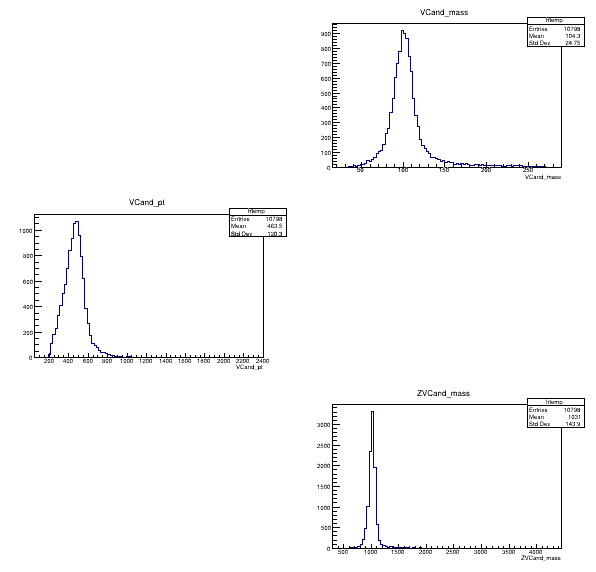

In [3]:
canv.Clear()

canv.Divide(2,3)
canv.cd(2)
tree.Draw("VCand_mass")
canv.cd(3)
tree.Draw("VCand_pt")
canv.cd(6)
tree.Draw("ZVCand_mass")
canv.Draw()

To save these canvases, use the ```Print()``` method inherited from TVirtualPad. The method covers a lot of the common image file types, namely **gif, jpg, png and pdf**.

```
canv.Print("./images/test_canvas.png")
```

The line above will save the image as a png file in the directory given.

# TColor: Your Palette 

Before we show you how to paint, let's walk around on what you are going to paint with, namely your color palette. ROOT has a set of colors predefined, using the recommended 216 colors suitable for web applications. Of course, you can mess around with the HTML colouring scheme, but why bother.

<img src="./images/tcolor.png" width=500>

A common method would be:

```
histo.SetLineColor(insert_color)   # to change color of lines
histo.SetMarkerColor(insert_color) # to change color of markers
histo.SetFillColor(insert_color)   # to change fill colors
```

To access a color later, let's say red, just type ```ROOT.kRed+n``` where n depends on the hue of the color you want. There are more stuff that you can do with TColor like color gradients and adjusting transparency, look it up on the documentation

# TAttMarker: Your Stencils

This class holds the attributes of the markers that you see in a lot of histograms or graphs. These markers are chosen with the ```SetMarkerStyle()``` method.

<img src="./images/marker1.png" width=500>

Let's say you want the Teutonic Cross as a marker just for fun with a very large size:

```
graph.SetMarkerStyle(45)
graph.SetMarkerSize(8)
```

# TAttLine: Your Brush

Just like markers, a line drawn with TLine objects are controlled by the TAttLine class. Line thickness/width is controlled by ```SetLineWidth()``` where 1 is equal to 1 pixel and 10 is 10 pixels. Line styles can be changed using the ```SetLineStyle()``` method with the following styles:

<img src="./images/linestyle.png" width=500>

# TAttFill: Your Bucket

And we continue to the fill component of drawing. The fill color is controlled as shown above while the fill area style uses ```SetFillStyle()```.

The common fill styles are:
* 0: hollow (no fill)
* 1001: Solid fill
* 3ijk: Fill with patterns controlled by the i, j, k numbers

For the third style, i controls the space between each hatch, j controls the angle of inclination between 0-90 degrees and k contros the opposite 90-180 degrees. Below are common styles used, because everyone is too lazy to play around with the ijk stuff.

<img src="./images/fillstyle.png" width=500>

Moving on from that, let's start painting. One of the most beautiful and the only thing a particle physicist knows how to paint is a histogram, and we use THistPainter for that.

# THistPainter: Like Windows Paint, but for Adults

Histograms are drawn via the THistPainter class. There are a lot of options and ways to plot a histogram, and how you plot it is important as it is how your research and data is conveyed. A good plot does not have to be artistic, it is one that a reader can get the most information out without too much or clutter or without having to think deep.

With the ```Draw()``` method, you place the drawing options inside. This will influence the output. By default, all histograms will be drawn like above, solid blue lines.

In [12]:
rnd_gen = ROOT.TRandom3()

h1 = ROOT.TH1F("h1", "A Histogram", 20, 0, 100)
h2 = ROOT.TH1F("h2", "Another Histogram", 20, 0, 100)
h3 = ROOT.TH2F("h3", "Yet Another Histogram", 20, 0, 100, 20, 0, 100)

for i in range(10000): 
    h1.Fill(rnd_gen.Gaus(75, 5))
    h2.Fill(rnd_gen.Gaus(40, 10))
    h3.Fill(rnd_gen.Gaus(65, 5), rnd_gen.Gaus(75, 5))

Of course, you can just draw it as it is, but that's not the reason why you're here right. A more detailed guide is in the THistPainter documentation.

Generally:
* Error Bars: Use "E", but if you don't want error bars then use "HIST"
* Superimpose: Use "SAME" on the histograms after the first one to draw on it, without stacking. If you don't specify this, the first plot will be deleted.
* Random Fill: "PFC" will choose a color from the palette and fill the histogram.
* Random Line: Like above, but "PLC"
* Random Marker: Like above, but "PMC"
* Lego Plots: Use "LEGO"


For TH1 histograms:

* Error Bars: "E1" adds perpendicular lines on the error bar
* Markers: "P0", draws a marker at every bin
* Lines: Lines are generally not recommended, unless its merely a line to guide the eye, but this needs to be mentioned explicitly otherwise it will be interpreted as a trend line. Use "L".

For TH2 histograms:

* Contours: Use "CONT", but there are variations available from "CONT0" to "CONT5".
* Surface Plot: Use "SURF"
* Boxes: Generally, use "COLZ"
* Arrows: Useful if you want to show gradient, divergence or curl. Use "ARR"

For THStack objects:

* No Stacking: Use "NOSTACK"
* Separate Pads: Use "PADS"

**Try:** Given the TH1F and TH2F made above, try and mess around with the plotting. Use the marker, line and fill attributes that you learnt before. Add histograms if you want. The canvas is yours.

**Note:** These options are not case-sensitive, so you can also write them in lower case form.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv2


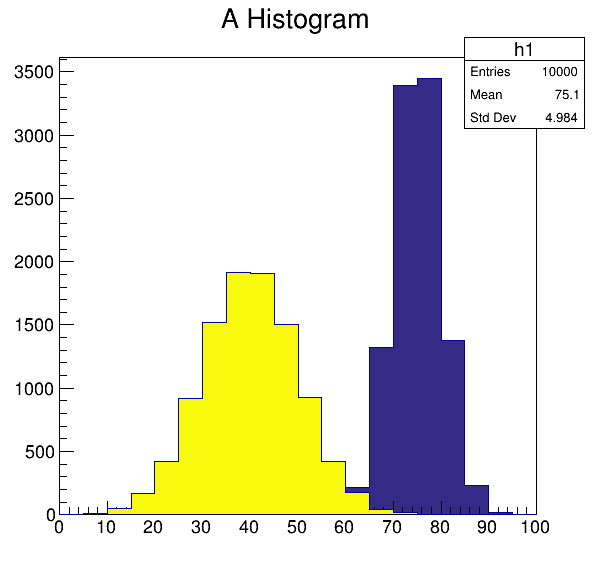

In [13]:
canv2 = ROOT.TCanvas("canv2", "Another canvas", 600, 600)

h1.Draw("PFC")
h2.Draw("pfc same")
canv2.Draw()

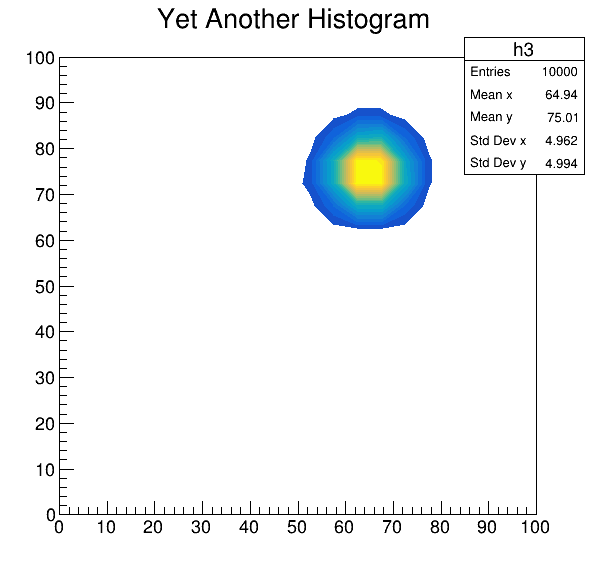

In [14]:
canv2.Clear()
h3.Draw("CONT")
canv2.Draw()

# TAxis: So What Does It Say?

An important part of plots are the axes, because they tell the reader what we are actually seeing. Is it an event distribution with respect to mass? Or is it your dart board that shows how bad you are at playing it?

The axis of a histogram is in itself a TAxis object, has its own name and title, but we are only concerned of the later because that is the one that is drawn. To change them:

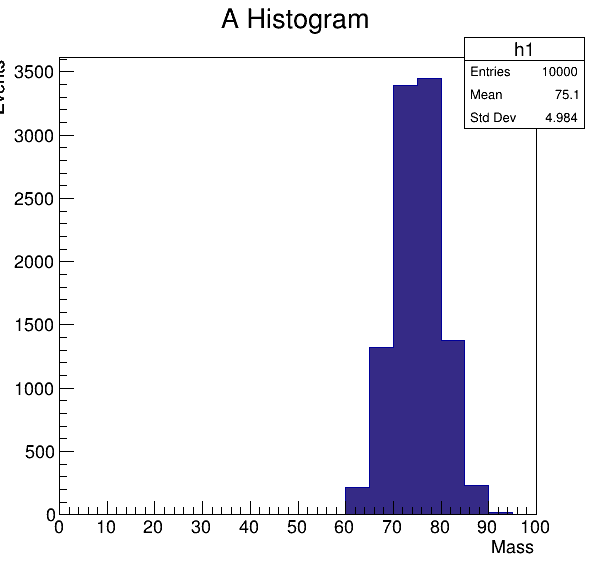

In [15]:
h1.GetXaxis().SetTitle("Mass")
h1.GetYaxis().SetTitle("Events")

canv2.Clear()
h1.Draw()
canv2.Draw()

## Useful Tip: Stats Display

Notice that box on the upper right that always come with your plots? Most of the time, you would not want it in because the information there might be irrelevant. 

A general rule of thumb, keep in your plot only the stuff that you want to show. This ensures the audience can focus on what YOU want them to see, not what THEY think you want them to see. There are a lot of other options available with the statistic display, but those stuff might be better off presented in a separate slide. Keep the plot as simple as possible, without simplifying the content.

You can easily remove it like this, by accessing the gStyle class:

In [16]:
# ROOT.gStyle.SetOptStat(0)
# canv2.Draw()

Generally, that's all the stuff you will commonly use. You can explore more cool options at the THistPainter documentation.

# TGraphPainter: More Painting, I Guess

This is basically like THistPainter, but for TGraph objects. General options are:

* Axis: Use "A" to draw the axes
* Trend Line: "L" will draw a simple polyline, but generally it is not advised. Better fit a function then draw on it.
* Fill: "F" fills the area covered by the error bars.
* Markers: "P" does the job

And your standard random commands, "PFC", "PLC" and "PMC"

**Try**: Given the graph below, mess around with it. Though, Jupyter Notebook has limitations with regards to printing out the canvases. You may want to try this in an independent macro.

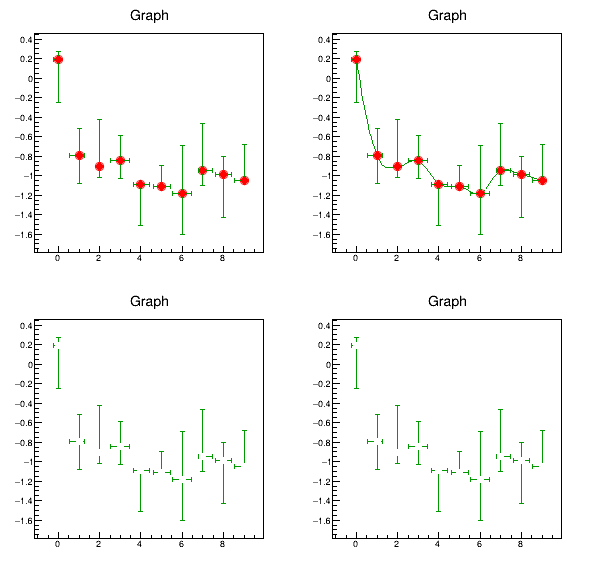

In [17]:
import numpy as np
import random as rng

gr = ROOT.TGraphAsymmErrors(10)
x  = np.arange(0, 10, 1)
f  = ROOT.TF1("f", "exp(-4*x^2)-1")

for i, xi in enumerate(x):
    gr.SetPoint(i, xi, f.Eval(xi)+rng.uniform(-0.25, 0.25))
    gr.SetPointError(i, rng.uniform(0, 0.5), rng.uniform(0, 0.5), rng.uniform(0, 0.5), rng.uniform(0, 0.5))

canv.Clear()
canv.Divide(2,2)
gr.SetMarkerStyle(20)
gr.SetMarkerColor(ROOT.kRed)
gr.SetLineColor(ROOT.kGreen+2)

canv.cd(1)
gr.Draw("AP")

canv.cd(2)
gr.Draw("ACP")

canv.cd(3)
gr.Draw("AB")

canv.cd(4)
gr.Draw("AF")

canv.Draw()

# TLegends: So, What is This Actually?

Another important part of a good plot, are legends, where necessary. The TLegend object collects the objects that the user puts in and their attributes.

```
lgd = ROOT.TLegend(x1, y1, x2, y2)
```

x1, y1, x2, and y2 are the coordinates of the legend in the current pad, ranging from 0 to 1 from one end of the pad to the other.

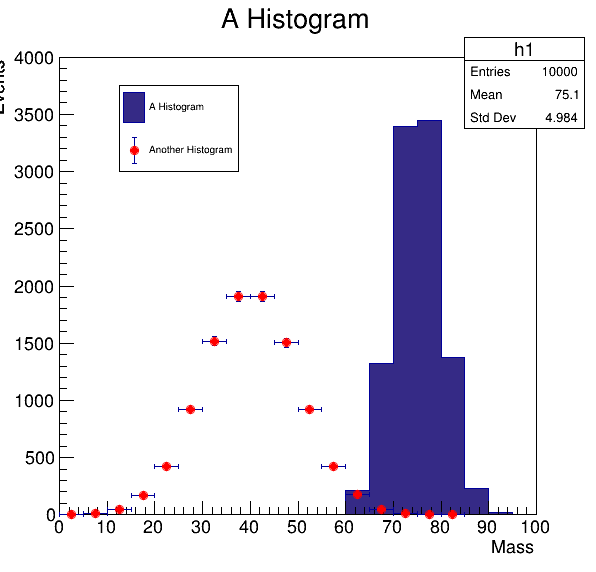

In [31]:
lgd = ROOT.TLegend(0.2, 0.7, 0.4, 0.85)

h1.SetMaximum(4000)
h2.SetMaximum(4000)

h2.SetMarkerStyle(20)
h2.SetMarkerColor(ROOT.kRed)

lgd.AddEntry(h1, h1.GetTitle(), "F")
lgd.AddEntry(h2, h2.GetTitle(), "PE")

canv2.Clear()
h1.Draw()
h2.Draw("E1 SAME")
lgd.Draw()
canv2.Draw()